Import Libraries

In [81]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# specific imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

Import Dataset

In [82]:
# Assign data to variable
dataset = pd.read_csv('combinedData.csv')

# Take a small look at the dataframe produced
print(dataset.head())

   January 2008  February 2008  March 2008  April 2008  May 2008  June 2008  \
0         86.10          86.30        86.4        86.3     86.20       86.3   
1          6.81           6.72         6.6         6.4      6.21        6.2   
2        119.20         119.60       120.1       121.2    121.60      122.3   

   July 2008  August 2008  September 2008  October 2008  ...  March 2023  \
0      86.30        86.30           86.30         85.60  ...      128.40   
1       6.37         6.25            6.16          6.46  ...        5.81   
2     123.30       123.80          123.10        123.20  ...      168.90   

   April 2023  May 2023  June 2023  July 2023  August 2023  September 2023  \
0      128.20    128.30     128.30     128.20       128.10          127.80   
1        5.75      5.74       5.85       5.99         6.17            6.27   
2      169.90    170.60     171.40     172.60       174.00          174.80   

   October 2023  November 2023  December 2023  
0        127.60  

Preprocess Data (normalize it!)

In [83]:
# Convert the date strings into datetime objects
converted_dates = []

for date in dataset.columns:
  datetime_object = datetime.strptime(date, '%B %Y')
  converted_dates.append(datetime_object.timestamp())

dates_array = np.array(converted_dates)

Encode Catagorical data

In [84]:
# Initialize the encoder to work with
label_encoder = LabelEncoder()

print(dataset.iloc[0])

# Fit the data needed to the encoder for later use
label_encoder.fit(dataset.iloc[0])

dataset.iloc[1] = label_encoder.transform(dataset.iloc[0])

January 2008       86.1
February 2008      86.3
March 2008         86.4
April 2008         86.3
May 2008           86.2
                  ...  
August 2023       128.1
September 2023    127.8
October 2023      127.6
November 2023     127.2
December 2023     127.2
Name: 0, Length: 192, dtype: float64


Split data into X and y sets

In [85]:
# define X and y variables
X = dates_array
y = dataset.iloc[0].values

# varify the split data
print(f"X dataset example: {X[0]}")
print(f"y dataset example: {y[0]}")

X dataset example: 1199145600.0
y dataset example: 86.1


Break data into Training and Test sets

In [86]:
# Split into 4 specific variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Setup hyperparameters

In [87]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200]
}

Instatiate the model

In [88]:
# plant the seeds to grow a forest
forest_model = RandomForestRegressor(random_state=0)

# Initiate the random search
random_search = RandomizedSearchCV(
    estimator = forest_model,  # use the model we created above
    param_distributions = param_dist,  # use the params we defined above
    n_iter = 10,  # Go over it 10 times
    cv = 5,  # Cross validation iterations
    scoring = 'neg_mean_squared_error',  # score output for performance
    random_state = 0
    )

Train the model

In [89]:
# Not tuned fit
forest_model.fit(X_train, y_train)

# call your model and pass in the training datasets
random_search.fit(X_train, y_train)  # Use the random_search now instead of forest object

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'n_estimators': [50, 100, 150, 200]},
                   random_state=0, scoring='neg_mean_squared_error')

Make the predictions you want it to output

In [90]:
# pass in X_test to predict a y value on forest model
y_predict = forest_model.predict(X_test)

print(f"Not Tuned: {y_predict}")

# Predict on the tuned model
tuned_pred = random_search.predict(X_test)

print(f"Tuned Predicition: {tuned_pred}")


Not Tuned: [ 88.926 102.567  94.023 102.711 100.823 129.609  83.342  82.877  82.834
  86.032  94.344 100.369  92.32   92.277 105.902  86.556 103.36   92.97
 100.31   92.914 128.469 107.789 103.142  97.215  92.572 102.824  84.863
 111.843  91.743 102.497 102.531 122.468  83.287  95.458 126.342  86.278
 102.793 102.639 120.147]
Tuned Predicition: [ 88.91533333 102.564       94.01266667 102.70466667 100.89066667
 129.61866667  83.34533333  82.856       82.82066667  85.98066667
  94.35866667 100.364       92.308       92.27933333 106.04333333
  86.55866667 103.32466667  92.99466667 100.30533333  92.90466667
 128.518      107.846      103.15133333  97.17866667  92.556
 102.85466667  84.93133333 111.77133333  91.75466667 102.51333333
 102.582      122.352       83.25533333  95.44266667 126.11666667
  86.27666667 102.78733333 102.64066667 120.15333333]


Check the model

In [91]:
# pass in your y test data and check it against your y predicted data
mse = mean_squared_error(y_test, y_predict)
selected_params = random_search.best_params_

# share with the world!
print(f"Initial Mean Squared Error: {mse}")
print(f"Best Parameters to use: {selected_params}")

Initial Mean Squared Error: 0.3063721025641313
Best Parameters to use: {'n_estimators': 150}


Re-Initialize Random Forest using the slected Params

In [92]:
# Instatiate another forest model with the selected parameters
final_forest = RandomForestRegressor(
    selected_params['n_estimators'],
    random_state=0
)

# Fit data to the new model
final_forest.fit(X_train, y_train)
final_pred = final_forest.predict(X_test)

final_mse = mean_squared_error(y_test, final_pred)

# Show hyper tuned MSE
print(f"Hyper Tuned Mean Squared Error: {final_mse}")

Hyper Tuned Mean Squared Error: 0.3101656068376412


Make a pretty graph!

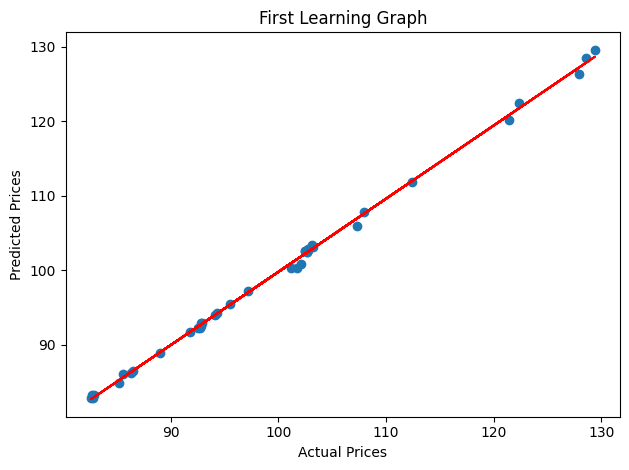

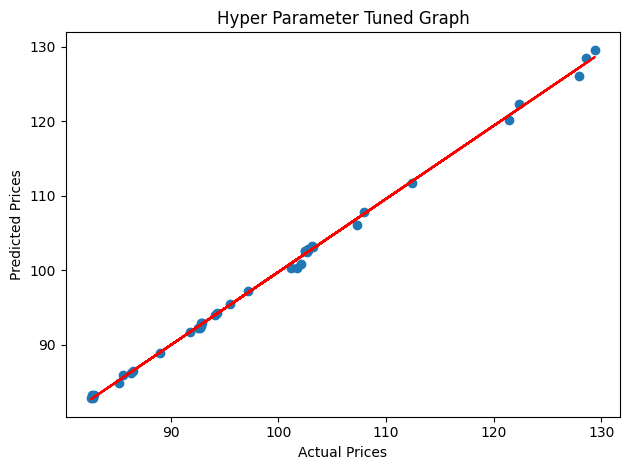

In [93]:
# Fit a linear regression line to the data
# For the non-tuned actual vs predicted values
coefficients_non_tuned = np.polyfit(y_test, y_predict, 1)

# For the hyperparameter-tuned actual vs predicted values
coefficients_tuned = np.polyfit(y_test, final_pred, 1)

# Generate the regression lines
line_non_tuned = np.polyval(coefficients_non_tuned, y_test)
line_tuned = np.polyval(coefficients_tuned, y_test)

# Plot the non-tuned actual vs predicted values
plt.scatter(y_test, y_predict)
plt.plot(
    y_test,
    line_non_tuned,
    color='red',
    label='Regression Line'
    )
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('First Learning Graph')

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot to a dynamic SVG file
plt.savefig('firstGraph.svg', format='svg', bbox_inches='tight')

plt.show()


# plot hyperparamer tuned actual vs predicted
plt.scatter(y_test, final_pred)
plt.plot(
    y_test,
    line_tuned,
    color='red',
    label='Regression Line'
    )
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Hyper Parameter Tuned Graph')

# Adjust layout
plt.tight_layout()

# Save and show
plt.savefig('TunedGraph.svg', format='svg', bbox_inches='tight')

plt.show()